In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors

In [17]:
df = pd.read_csv(r'../data/to_vis.csv')

In [18]:
metric_features = ['ADR', 'BookingChanges',
                'DaysInWaitingList', 'LeadTime', 'PreviousBookingsNotCanceled',
                'PreviousCancellations', 'StaysInWeekendNights',
                'StaysInWeekNights', 'TotalOfSpecialRequests']
non_metric_features = ['ArrivalDate','ArrivalDateWeekNumber',  'AssignedRoomType', 'Country', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus',
                    'ReservationStatusDate', 'ReservedRoomType', 'Adults', 'Babies','Children', 'RequiredCarParkingSpaces']

In [19]:
df[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,53422.0,110.993917,48.057274,0.0,84.0,105.3,134.0,5400.0
BookingChanges,53422.0,0.246397,0.704098,0.0,0.0,0.0,0.0,21.0
DaysInWaitingList,53422.0,1.020347,11.902366,0.0,0.0,0.0,0.0,391.0
LeadTime,53422.0,77.683539,82.113124,0.0,14.0,50.0,118.0,629.0
PreviousBookingsNotCanceled,53422.0,0.191513,2.038911,0.0,0.0,0.0,0.0,72.0
PreviousCancellations,53422.0,0.035772,0.372805,0.0,0.0,0.0,0.0,21.0
StaysInWeekendNights,53422.0,0.872131,0.913671,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,53422.0,2.274363,1.618217,0.0,1.0,2.0,3.0,41.0
TotalOfSpecialRequests,53422.0,0.711055,0.833557,0.0,0.0,1.0,1.0,5.0


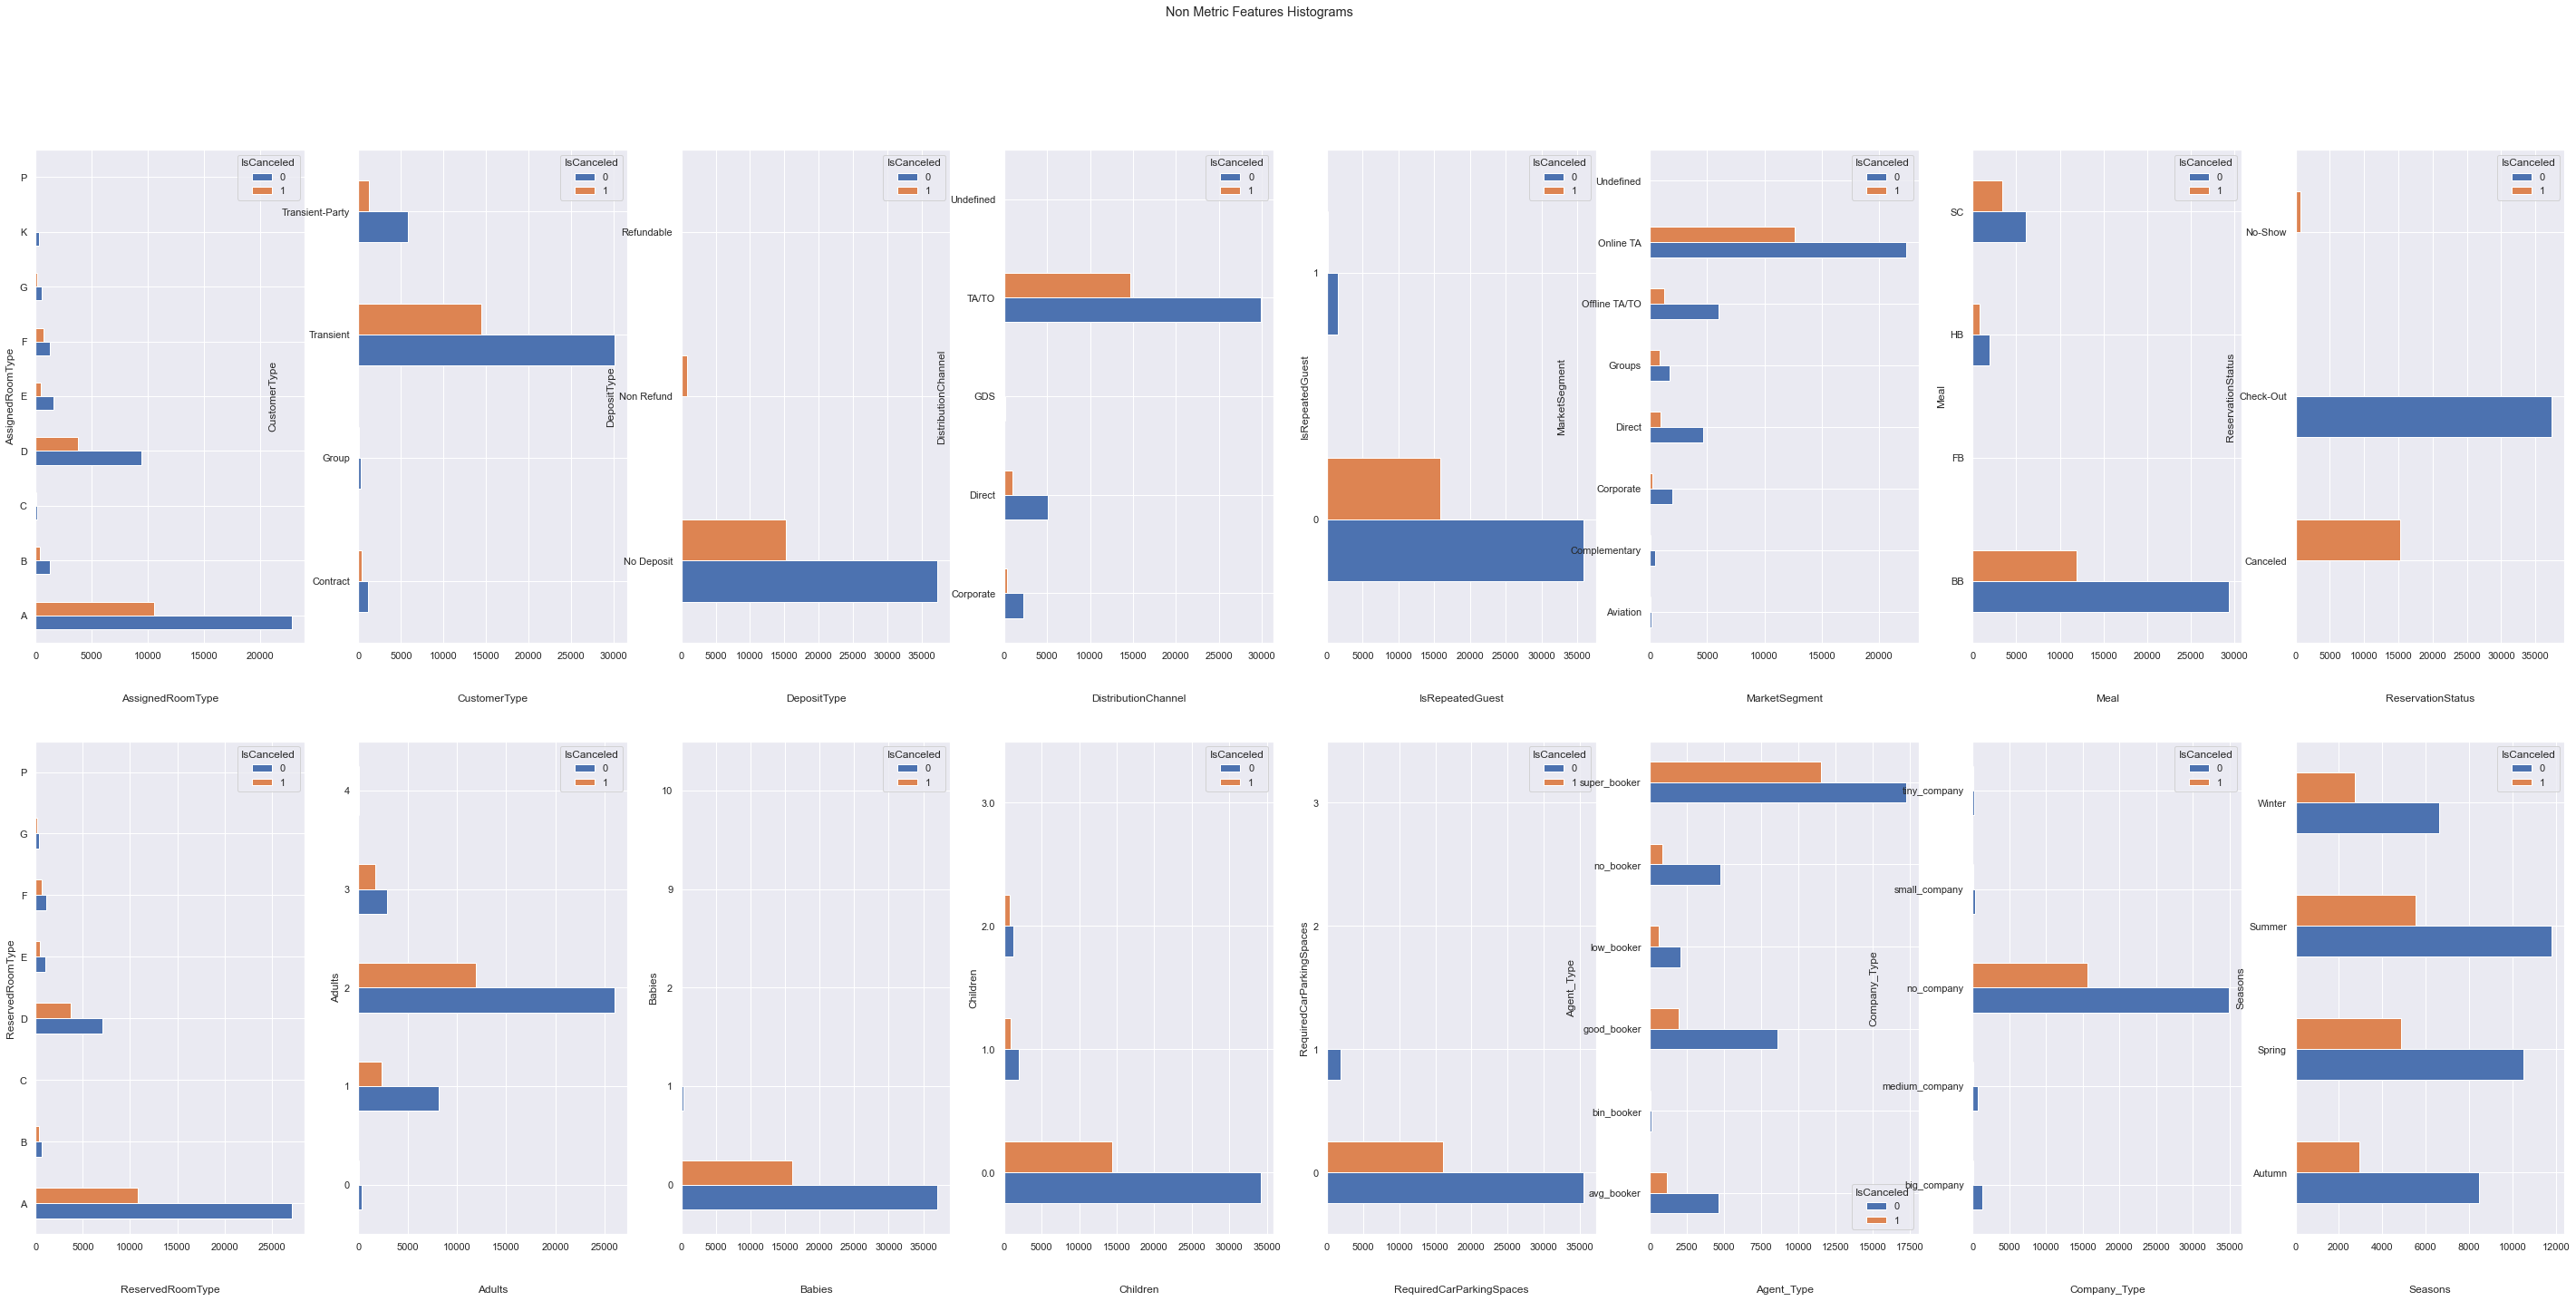

In [20]:
# Non Metric Features Histograms except dates
nmtplotft = ['AssignedRoomType', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus'
                    , 'ReservedRoomType', 'Adults', 'Babies','Children', 'RequiredCarParkingSpaces', 'Agent_Type', 'Company_Type','Seasons']
sns.set()
fig, axes = plt.subplots(2, ceil(len(nmtplotft) / 2), figsize=(50, 22))

for ax, feat in zip(axes.flatten(), nmtplotft):
    df.groupby(['IsCanceled',feat]).size().unstack(0).plot.barh(ax=ax)
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()

<AxesSubplot:xlabel='ArrivalDate,ArrivalDate'>

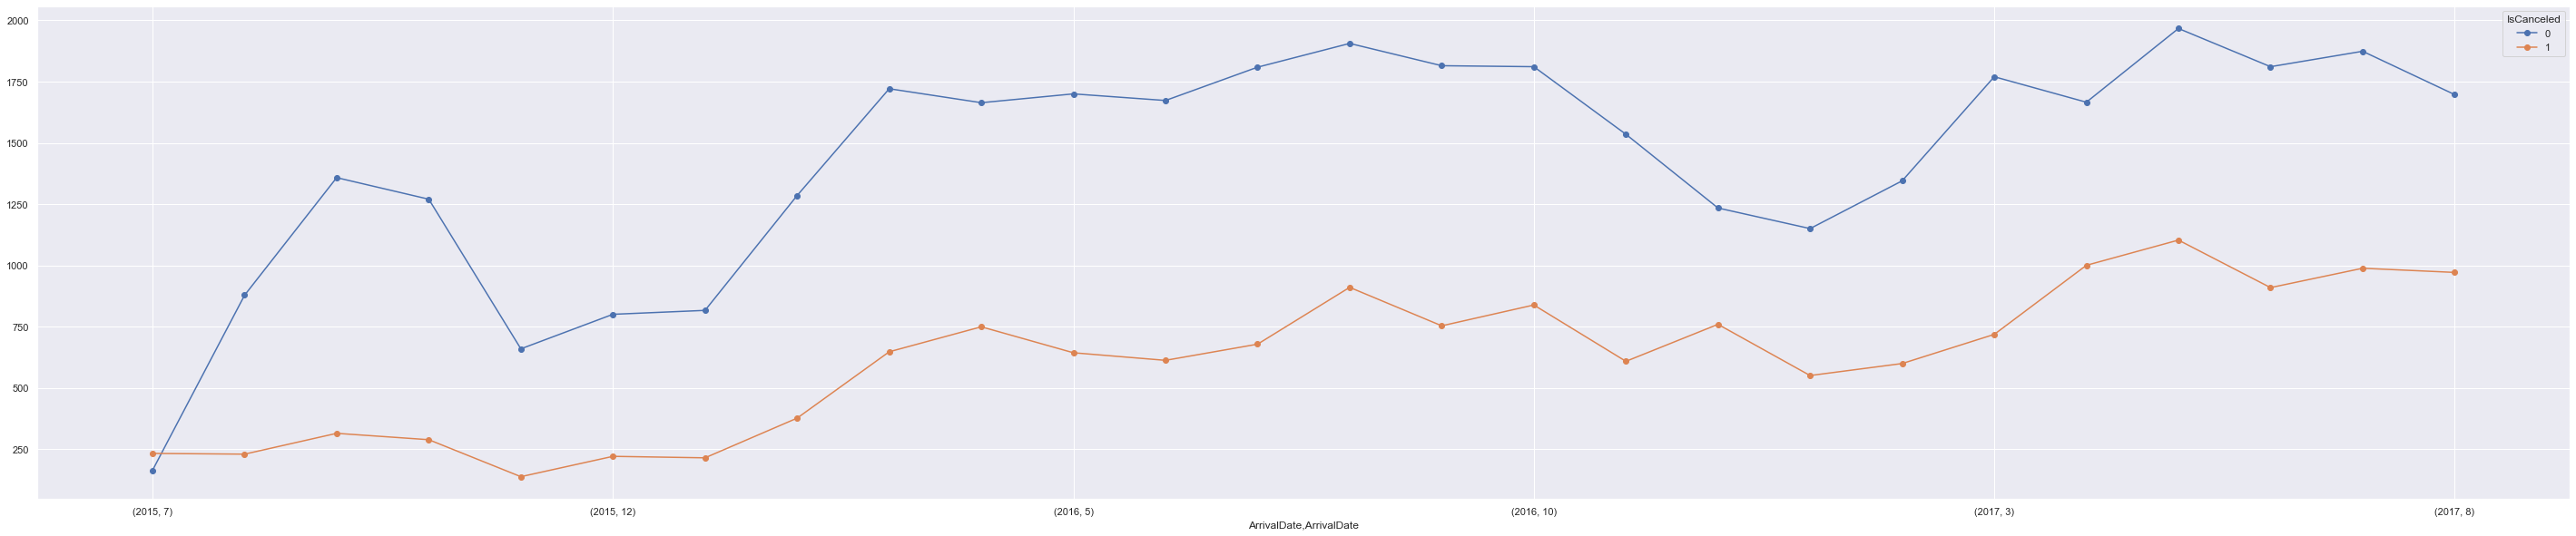

In [21]:
fig, ax = plt.subplots(figsize=(50,10))
df.groupby([df.IsCanceled,
pd.DatetimeIndex(df['ArrivalDate']).year,
pd.DatetimeIndex(df['ArrivalDate']).month]
).size().unstack(0).plot(ax=ax, marker='o', legend = True)

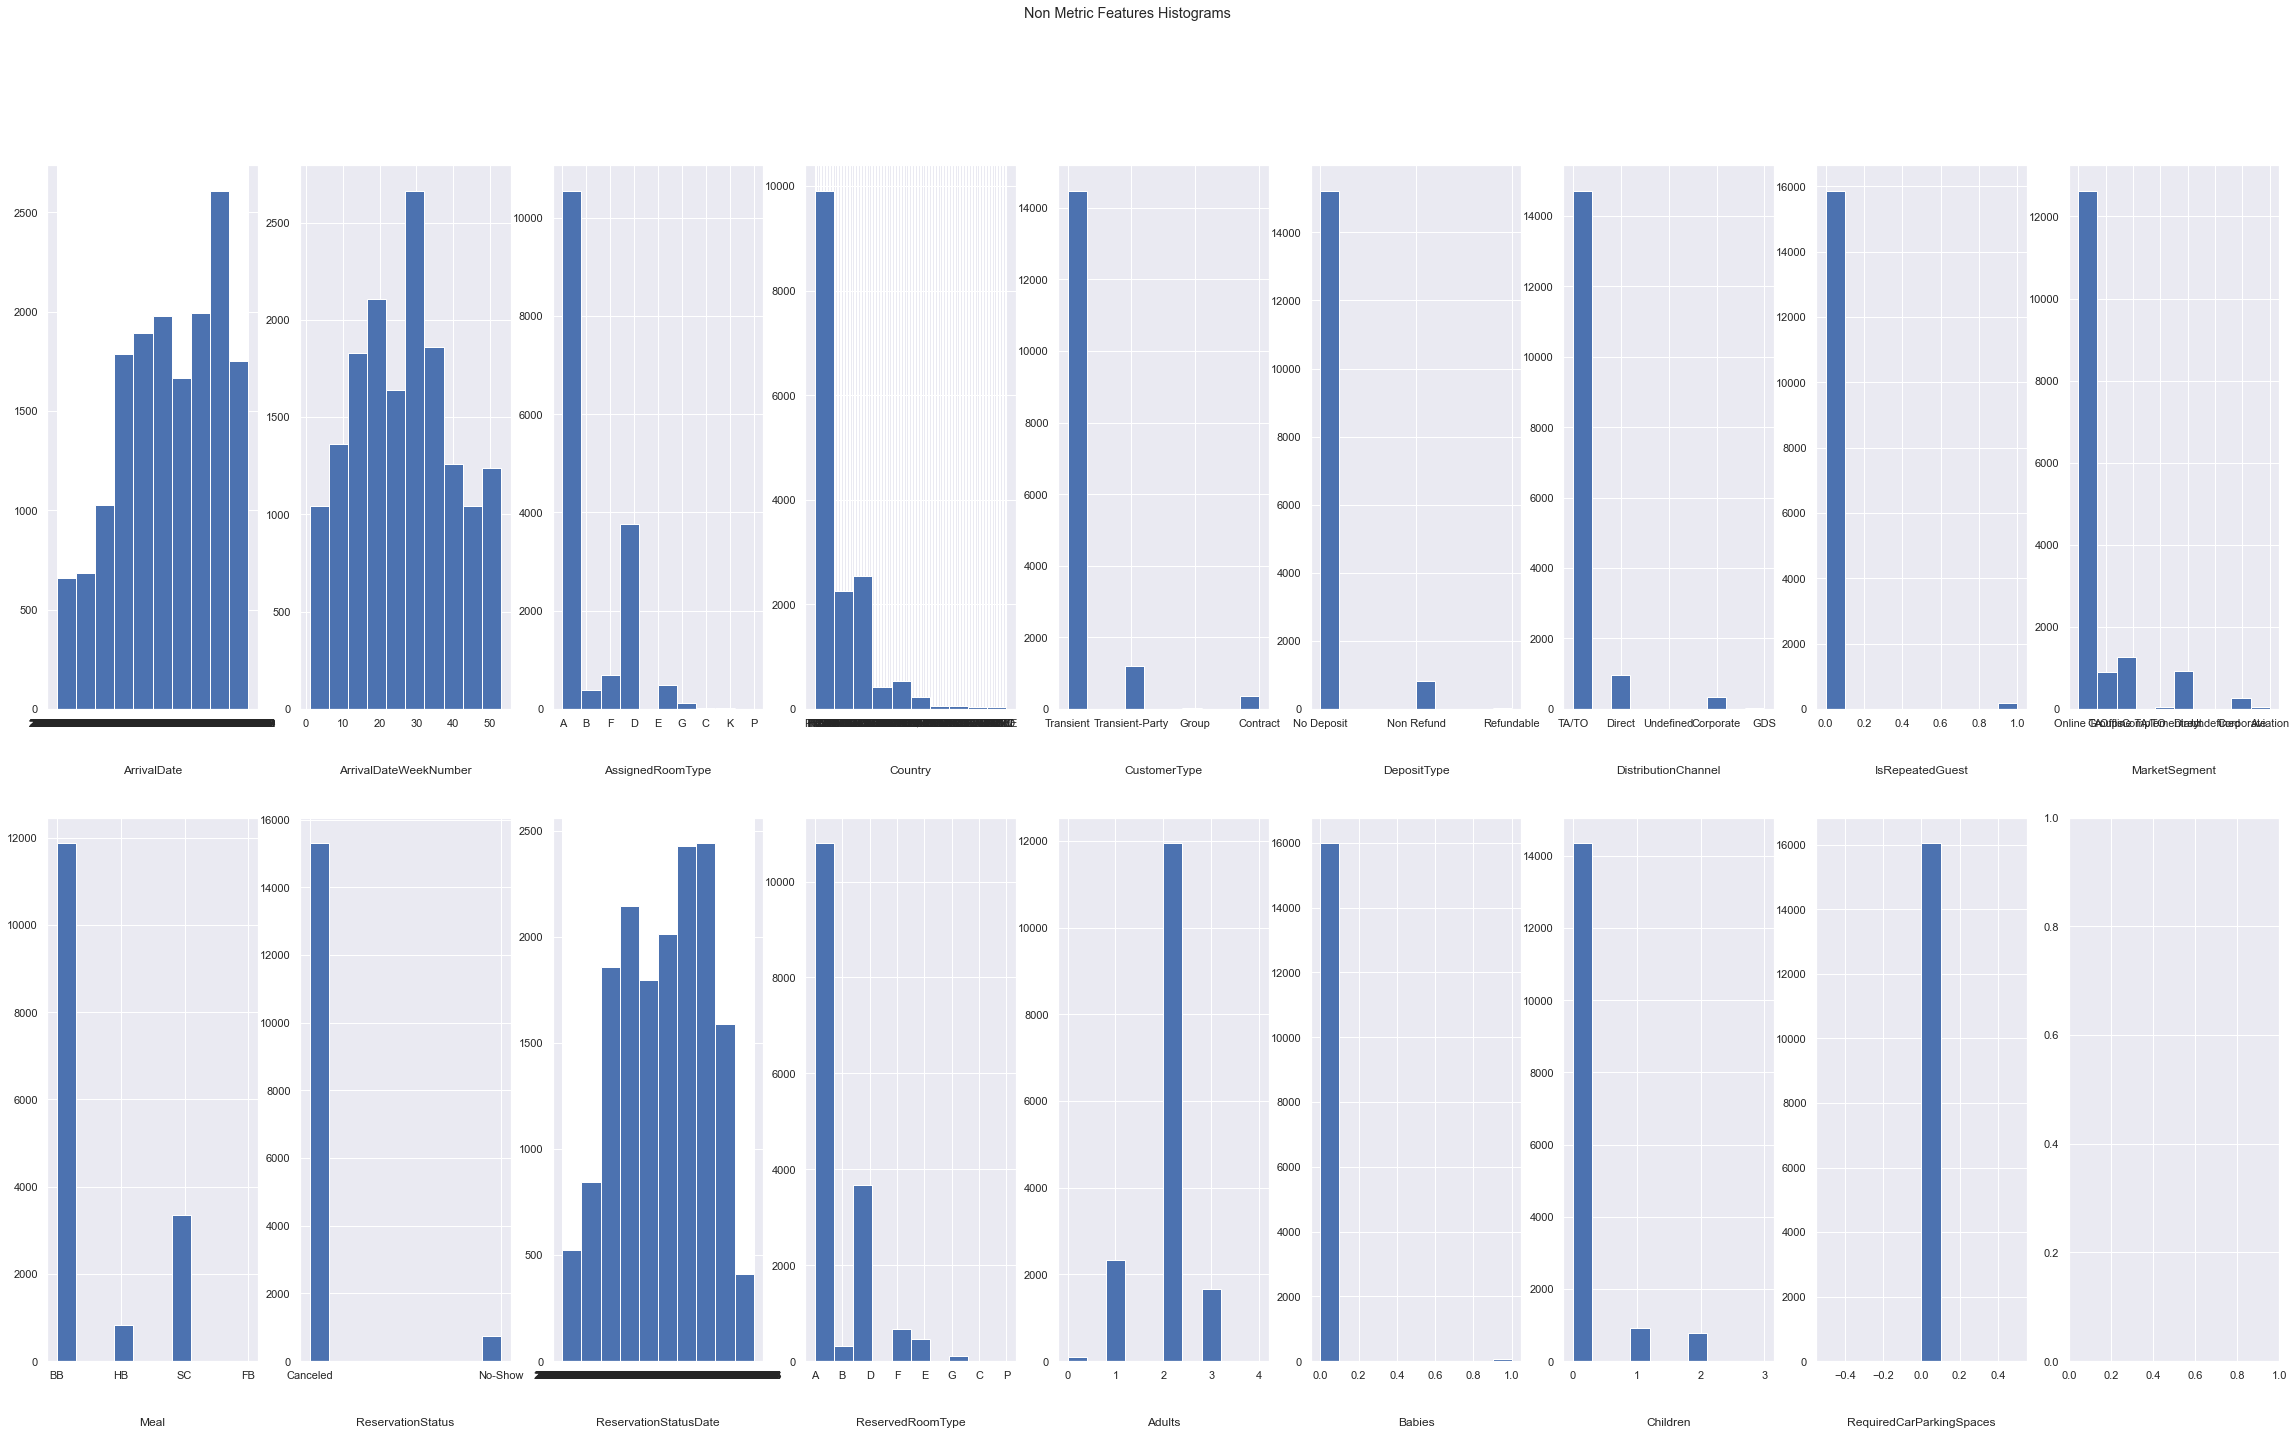

In [22]:
# Non Metric Features Histograms
sns.set()
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(40, 22))

for ax, feat in zip(axes.flatten(), non_metric_features):
    ax.hist(df[feat][df['IsCanceled'] == 1])
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()

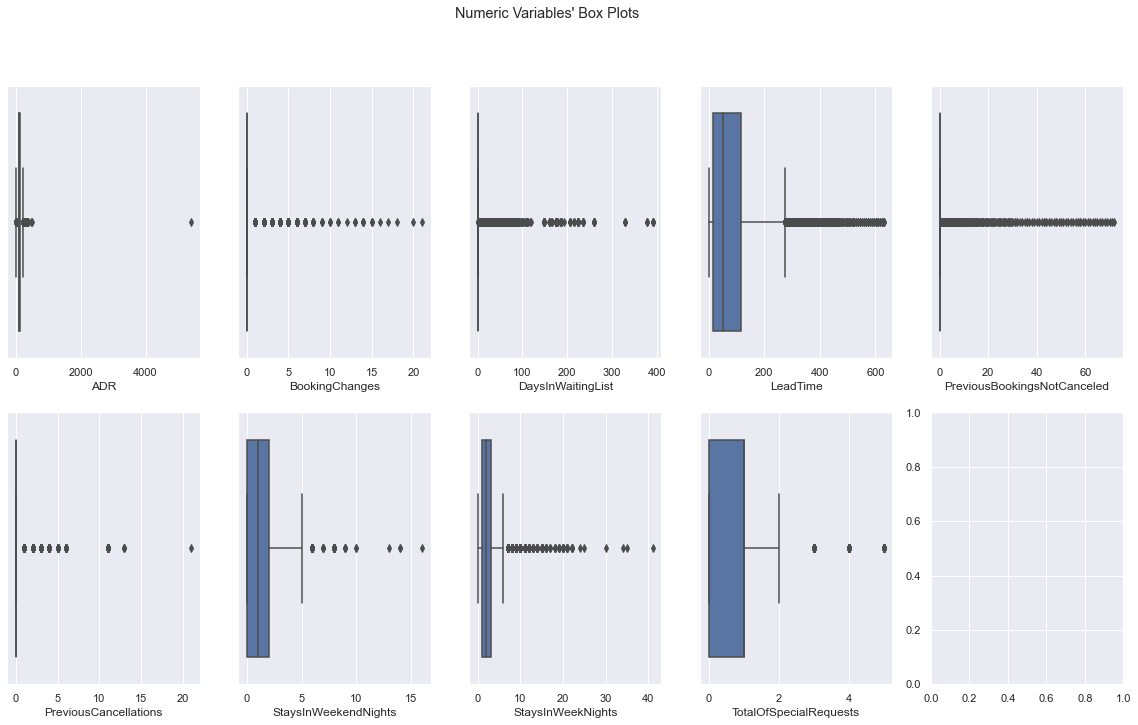

In [23]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

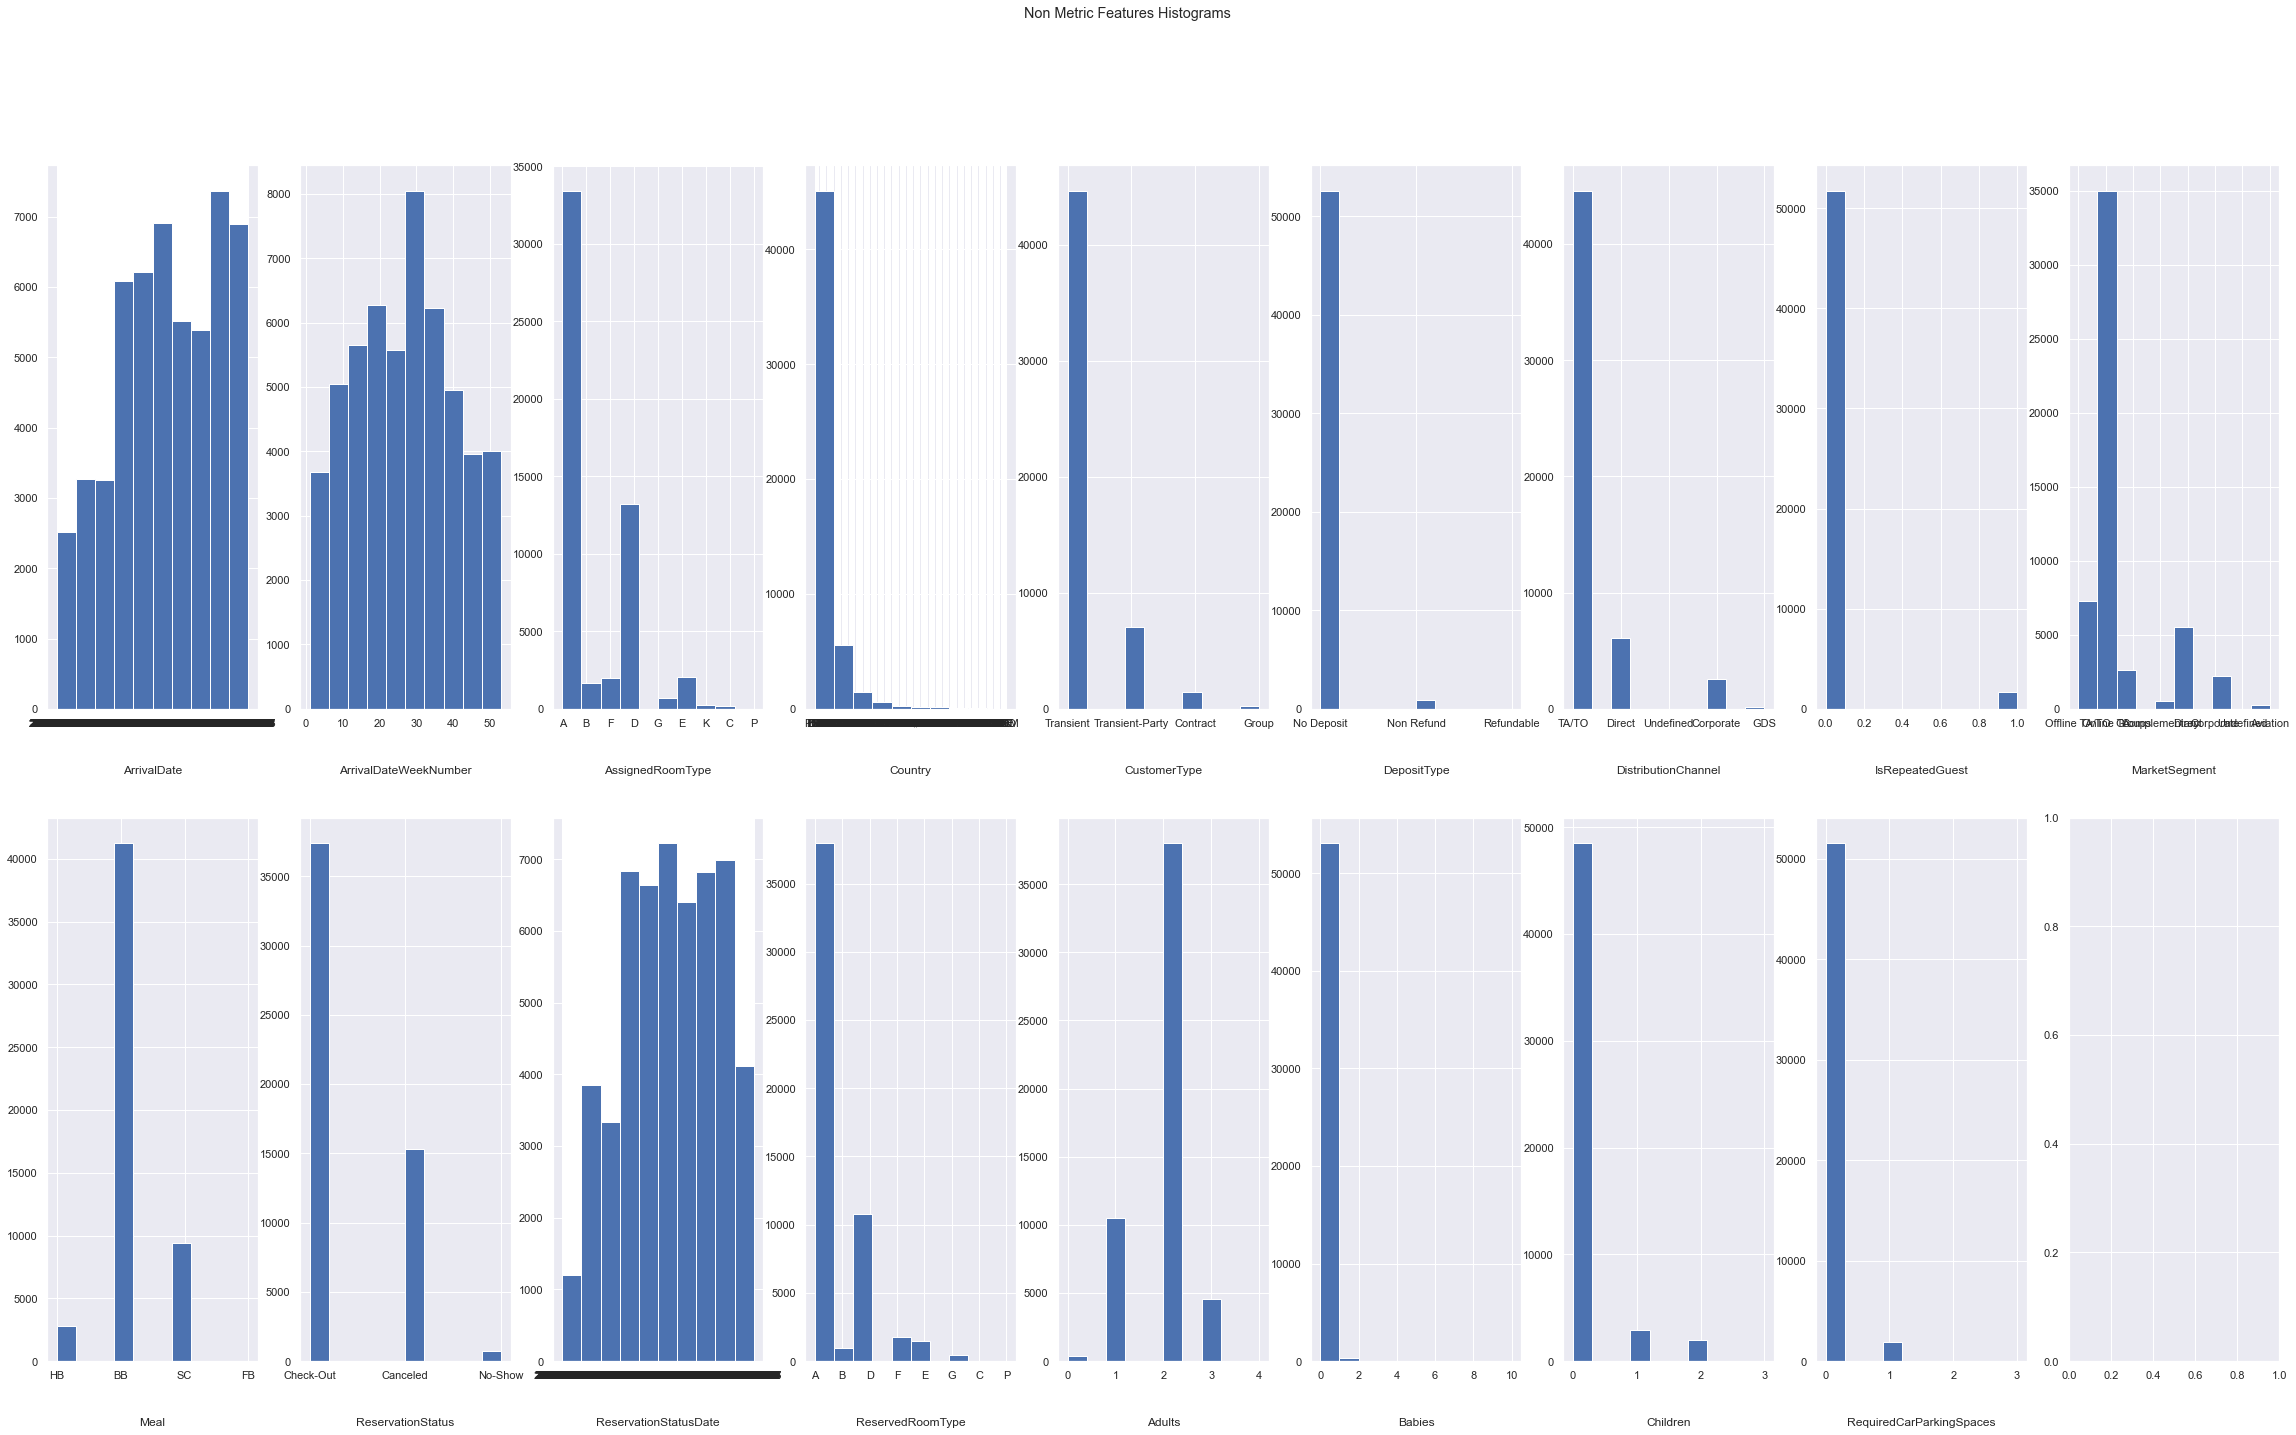

In [24]:
# Non Metric Features Histograms
sns.set()
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(40, 22))

for ax, feat in zip(axes.flatten(), non_metric_features):
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()